# Esempi di filtraggio - Notebook 2.2

Import delle librerie necessarie per la simulazione

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import pydicom
import os
import imageio
from scipy.spatial.distance import euclidean

## Import dei dati DICOM e visualizzazione di una fetta del fantoccio

Patient ID: SNMCB04
512 512 63
dimesioni del dato: 0.683594 0.683594 2.5
Reading DICOM (examining files): 1/63 files (1.6%63/63 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 63/63  (100.0%)
FOV: [350.000128, 350.000128, 157.5]
(63, 512, 512)
(512, 512)


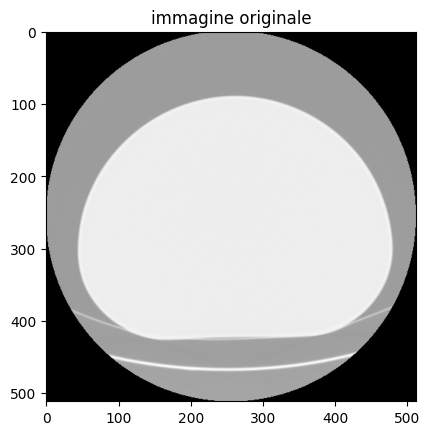

In [42]:
# set directory
directory = '../data/Phantom_CT_PET/2-CT 2.5mm-5.464/'

# get all files in directory
files = sorted(os.listdir(directory))

# get info from dicom
ds = pydicom.dcmread(directory + files[0])
print("Patient ID:", ds.PatientID)

# get size along 3 axis
xSize = ds.Rows
ySize = ds.Columns
zSize = len(files)
print(xSize, ySize, zSize)

# get resolution
dx = ds.PixelSpacing[0]
dy = ds.PixelSpacing[1]
loc1 = ds.ImagePositionPatient
ds2  = pydicom.dcmread(directory + files[1])
loc2 = ds2.ImagePositionPatient
dz = euclidean(loc1, loc2)
print("dimesioni del dato:", dx, dy, dz)

# import volume
vol = imageio.volread(directory, 'DICOM')
FOV = [dx*xSize,dy*ySize,dz*zSize]
print("FOV:", FOV)
print(vol.shape)

# get plane
img = vol[9,:,:]
print(img.shape)

# original image
fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')
ax.set_title("immagine originale")
plt.show()

## Filtro a media mobile: è possibile cambiare la dimensione del filtro per apprezzarne l'effetto sull'immagine filtrata. 

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/296414372.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_ma, cmap = 'gray')


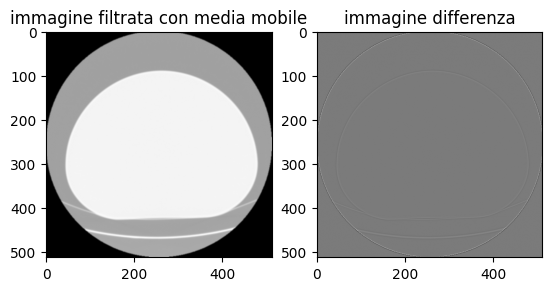

In [43]:
# moving average filter
weights = [[1/9, 1/9, 1/9],
           [1/9, 1/9, 1/9],
           [1/9, 1/9, 1/9]]

img_ma = ndi.convolve(img, weights)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_ma, cmap = 'gray')
ax[0].set_title("immagine filtrata con media mobile")
ax[1].imshow(img-img_ma, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

## Filtro Gaussiano: è possibile variare la dimensione del filtro e la $\sigma$ per apprezzarne l'effetto sull'immagine filtrata.

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/351799351.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_gaussian, cmap = 'gray')


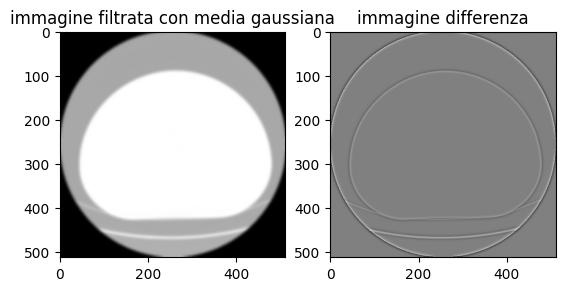

In [44]:
# gaussian average filter
img_gaussian = ndi.gaussian_filter(img, sigma = 3)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_gaussian, cmap = 'gray')
ax[0].set_title("immagine filtrata con media gaussiana")
ax[1].imshow(img-img_gaussian, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

## Filtro mediano: notare il mantenimento dei bordi rispetto al filtro a media mobile o a quello Gaussiano.

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/2759418975.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_median, cmap = 'gray')


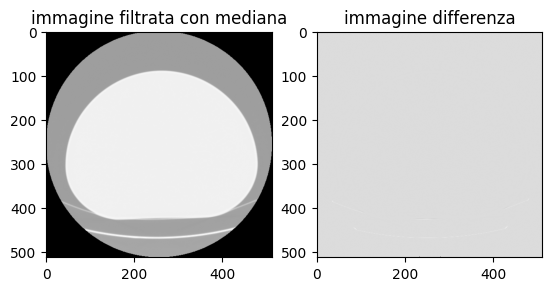

In [45]:
# median filter
img_median = ndi.median_filter(img, size = 3)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_median, cmap = 'gray')
ax[0].set_title("immagine filtrata con mediana")
ax[1].imshow(img-img_median, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

## Filtro di Sobel: esempio di filtro derivativo per enfatizzare i contorni. 

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/862965885.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_sobel_0, cmap = 'gray')


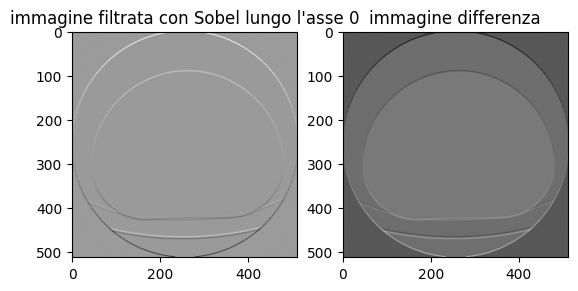

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/862965885.py:16: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_sobel_1, cmap = 'gray')


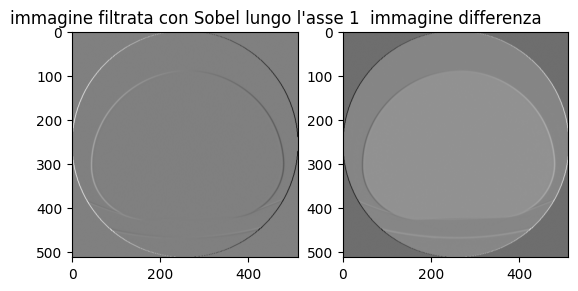

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/862965885.py:20: RuntimeWarning: invalid value encountered in sqrt
  img_sobel = np.sqrt(img_sobel_0**2 + img_sobel_1**2)
/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/862965885.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_sobel, cmap = 'gray')


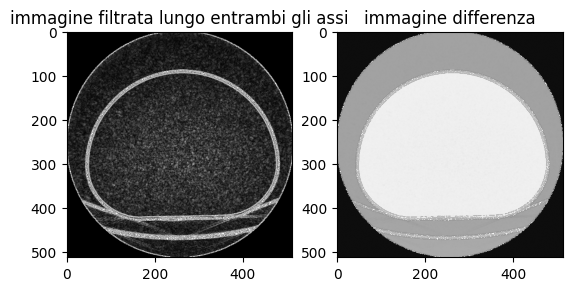

In [46]:
# sobel filter
img_sobel_0 = ndi.sobel(img, axis = 0)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_sobel_0, cmap = 'gray')
ax[0].set_title("immagine filtrata con Sobel lungo l'asse 0")
ax[1].imshow(img-img_sobel_0, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

img_sobel_1 = ndi.sobel(img, axis = 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_sobel_1, cmap = 'gray')
ax[0].set_title("immagine filtrata con Sobel lungo l'asse 1")
ax[1].imshow(img-img_sobel_1, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

img_sobel = np.sqrt(img_sobel_0**2 + img_sobel_1**2)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_sobel, cmap = 'gray')
ax[0].set_title("immagine filtrata lungo entrambi gli assi")
ax[1].imshow(img-img_sobel, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()

## Filtro laplaciano: altro tipo di filtro derivativo. Notare le differenze con il filtro di Sobel. 

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7633/1278184842.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].imshow(img-img_laplace, cmap = 'gray')


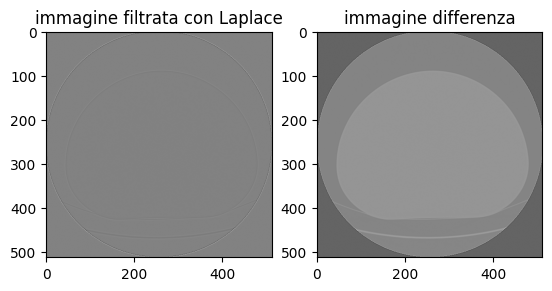

In [47]:
# laplace filter
img_laplace = ndi.laplace(img)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_laplace, cmap = 'gray')
ax[0].set_title("immagine filtrata con Laplace")
ax[1].imshow(img-img_laplace, cmap = 'gray')
ax[1].set_title("immagine differenza")
plt.show()